In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import simulate_euler

In [2]:
relu = lambda x: np.maximum(0, x)

In [3]:
def run_calcs(N, g, A, phi=relu):
    J = np.random.normal(loc=0, scale=g**2/N, size=(N,N))
    x0 = np.zeros(N)
    dt = 0.01
    T = 10
    x_dot = lambda x: -x + J.dot(phi(x)) + A
    
    xt = simulate_euler.simulate(x_dot, x0, dt, T)
    x_dist, x_buckets = np.histogram(xt[-1, :])
    plt.plot(x_buckets[:-1], x_dist)
    plt.title("Distribution of neuron values")
    plt.show()
    print("Mean:", xt[-1, :].mean())
    print("Std:", xt[-1, :].std())

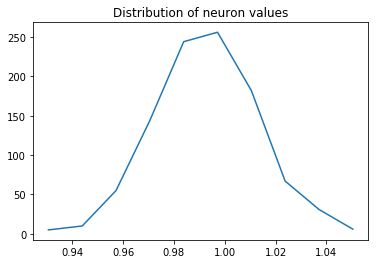

Mean: 0.9995577438526534
Std: 0.020117835659366996


In [4]:
run_calcs(N=1000, g=0.8, A=1)

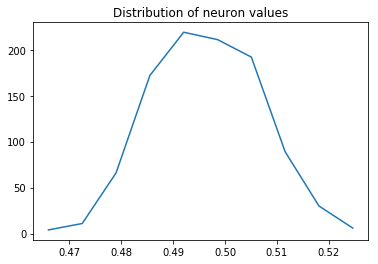

Mean: 0.49956357012765573
Std: 0.010330823665992205


In [5]:
run_calcs(N=1000, g=0.8, A=0.5)

In [6]:
@np.vectorize
def integral(sigma, g, A):
    integrand = lambda z: np.exp(-z**2 / 2) * (A + sigma * z)**2
    lower_limit = -A / sigma
    z = np.arange(lower_limit, A/sigma, 0.001)
    
    return g**2 / np.sqrt(2*np.pi) * np.sum(integrand(z)) 

In [7]:
sigma_range = np.linspace(0.0001, 0.1, 1000)
right_side = integral(sigma_range, g=0.8, A=1)
left_side = sigma_range ** 2

In [8]:
np.abs(left_side - right_side).min()

640.000006259615

In [9]:
right_side[400]

641.0291263992166

In [10]:
sigma_range ** 2

array([1.00000e-08, 4.00000e-08, 9.00000e-08, 1.60000e-07, 2.50000e-07,
       3.60000e-07, 4.90000e-07, 6.40000e-07, 8.10000e-07, 1.00000e-06,
       1.21000e-06, 1.44000e-06, 1.69000e-06, 1.96000e-06, 2.25000e-06,
       2.56000e-06, 2.89000e-06, 3.24000e-06, 3.61000e-06, 4.00000e-06,
       4.41000e-06, 4.84000e-06, 5.29000e-06, 5.76000e-06, 6.25000e-06,
       6.76000e-06, 7.29000e-06, 7.84000e-06, 8.41000e-06, 9.00000e-06,
       9.61000e-06, 1.02400e-05, 1.08900e-05, 1.15600e-05, 1.22500e-05,
       1.29600e-05, 1.36900e-05, 1.44400e-05, 1.52100e-05, 1.60000e-05,
       1.68100e-05, 1.76400e-05, 1.84900e-05, 1.93600e-05, 2.02500e-05,
       2.11600e-05, 2.20900e-05, 2.30400e-05, 2.40100e-05, 2.50000e-05,
       2.60100e-05, 2.70400e-05, 2.80900e-05, 2.91600e-05, 3.02500e-05,
       3.13600e-05, 3.24900e-05, 3.36400e-05, 3.48100e-05, 3.60000e-05,
       3.72100e-05, 3.84400e-05, 3.96900e-05, 4.09600e-05, 4.22500e-05,
       4.35600e-05, 4.48900e-05, 4.62400e-05, 4.76100e-05, 4.900